# Amadeus Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bz2

## Exercise 1

- Count the number of lines in Python for each file

### - What type of file do I have?

bz2 is a free and open-source file compression program that uses the Burrows–Wheeler algorithm.

bzip2 compresses most files more effectively than the older LZW (.Z) and Deflate (.zip and .gz) compression algorithms, but is considerably slower. 

In [2]:
!ls -l ../../Data/challenge

total 1019188
-rwxr-x--- 1 dsc dsc 554970628 mar 13 17:24 bookings.csv.bz2
-rw-r--r-- 1 dsc dsc   5473249 may  5 10:01 bookings.sample.csv.bz2
-rwxr-x--- 1 dsc dsc 483188920 mar 13 17:24 searches.csv.bz2


In [3]:
!pwd

/home/dsc/Master-Data-Science/Amadeus_Challenge


In [4]:
! bzcat {path_to_zips}bookings.csv.bz2 | head -100000 | bzip2 -c > {path_to_zips}bookings.sample.csv.bz2

bzcat: Can't open input file {path_to_zips}bookings.csv.bz2: No such file or directory.


In [4]:
path_to_zips = "/home/dsc/Data/challenge/"
f_bookings = "bookings.csv.bz2"
f_searches = "searches.csv.bz2"
f_bookings_sample = "bookings.sample.csv.bz2"

### - How can I read it?

Created a small sample to check if the codes below are right<br>
first result after using with file as: 5000006, which is wrong as I used readlines()<br>
second result after using with file as: 10000011 <br>

In [8]:
# reading lines in bookings to check the code is right

count = 0

with bz2.BZ2File(path_to_zips+f_bookings_sample, "r") as file:
    for line in file:
        count+=1
print(count)

100000


In [7]:
# reading lines in bookings

count = 0

with bz2.BZ2File(path_to_zips+f_bookings, "r") as file:
    for line in file:
        count+=1
print(count)

10000011


In [10]:
# reading lines in searches

count = 0

with bz2.BZ2File(path_to_zips+f_searches, "r") as file:
    for line in file:
        count+=1
print(count)

20390199


## Exercise 2

Top 10 arrival airports in the world in 2013 (using the bookings file)

Arrival airport is the column arr_port. It is the IATA code for the airport
To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
Print the top 10 arrival airports in the standard output, including the number of passengers.

In [9]:
df_bookings = pd.read_csv(path_to_zips+f_bookings_sample, compression='bz2', sep='^')
df_bookings.columns = df_bookings.columns.str.strip() #clear spaces from headers
df_bookings.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

In [11]:
df_bookings_arr_pax = df_bookings[df_bookings['year'] == 2013][['arr_port', 'pax']]
df_bookings_arr_pax.head()

,arr_port,pax
0,LHR,-1
1,CLT,1
2,CLT,1
3,SVO,1
4,SVO,1


In [13]:
df_bookings_arr_pax['arr_port'] = df_bookings_arr_pax['arr_port'].str.strip().str.upper()

In [16]:
df_bookings_all = pd.DataFrame()

for chunk in pd.read_csv(path_to_zips+f_bookings, compression='bz2', sep='^', chunksize=100000, low_memory=False):
    chunk.columns = chunk.columns.str.strip().str.lower() #clear spaces from headers    
    df_bookings_all = df_bookings_all.append(chunk[chunk['year'] == 2013][['arr_port', 'pax']])

In [94]:
df_bookings_all['arr_port'] = df_bookings_all['arr_port'].str.strip()

In [112]:
df_final_10 = df_bookings_all.groupby('arr_port', as_index=False).sum().sort_values(by='pax', ascending=False).head(10)
df_final_10.head(10)

,arr_port,pax
1088,LHR,88809.0
1190,MCO,70930.0
1050,LAX,70530.0
1047,LAS,69630.0
886,JFK,66270.0
315,CDG,64490.0
216,BKK,59460.0
1228,MIA,58150.0
1719,SFO,58000.0
517,DXB,55590.0


#### Bonus point

Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

In [99]:
url = 'https://raw.githubusercontent.com/opentraveldata/geobases/public/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv'

df_airports = pd.read_csv(url, sep='^', header=None, usecols=[0,1])
df_airports.sample(5)

,0,1
2958,NRS,Ream Field
439,GOU,Garoua
2135,TBJ,Tabarka
2884,#SDL,Scottsdale Airport
2200,JRO,Kilimanjaro International Airport


In [110]:
df_airports.columns = ['arr_port', 'city']
df_airports.head()

,arr_port,city
0,AUH,Abu Dhabi International Airport
1,AZI,Abu Dhabi Bateen Airport
2,AAN,Al Ain International Airport
3,DXB,Dubai International Airport
4,FJR,Fujairah


In [113]:
df_final_10_joined = df_final.join(df_airports.set_index('arr_port'), on='arr_port')
df_final_10_joined

,arr_port,pax,city
1088,LHR,88809.0,London Heathrow Airport
1190,MCO,70930.0,Orlando International Airport
1050,LAX,70530.0,Los Angeles International Airport
1047,LAS,69630.0,McCarran International Airport
886,JFK,66270.0,John F Kennedy International Airport
315,CDG,64490.0,Paris - Charles-de-Gaulle
216,BKK,59460.0,Suvarnabhumi
1228,MIA,58150.0,Miami International Airport
1719,SFO,58000.0,San Francisco International Airport
517,DXB,55590.0,Dubai International Airport


## Exercise 3

Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 
Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

In [7]:
df_searches = pd.read_csv(path_to_zips+f_searches, compression='bz2', sep='^', nrows=100000)
df_searches.head(10)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
5,2013-01-01,22:00:28,MPT,3561a60621de06ab1badc8ca55699ef3,US,IAH,BLR,1,2,IAH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
6,2013-01-01,10:47:14,MPT,d327ca6e35cc6732d4709828327ac7c1,DK,CPH,PAR,1,2,CPH,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
7,2013-01-01,23:39:49,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,PAR,DUB,1,2,PAR,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
8,2013-01-01,17:08:46,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,DUS,ACE,1,2,DUS,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
9,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1,2,FRA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ


We are going to check the names and format of the column names to see if we need to delete spaces.

In [8]:
list(df_searches.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

Check the content and format of the column 'Destination'

In [9]:
list(df_searches['Destination'])[:20]

['AUH',
 'MIL',
 'SFO',
 'ARN',
 'MAD',
 'BLR',
 'PAR',
 'DUB',
 'ACE',
 'BGW',
 'BUD',
 'POA',
 'MXP',
 'LON',
 'SNN',
 'SLZ',
 'PHL',
 'GRU',
 'IKT',
 'HKG']

In [10]:
df_searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
Date                 100000 non-null object
Time                 100000 non-null object
TxnCode              100000 non-null object
OfficeID             100000 non-null object
Country              99985 non-null object
Origin               100000 non-null object
Destination          100000 non-null object
RoundTrip            100000 non-null int64
NbSegments           100000 non-null int64
Seg1Departure        100000 non-null object
Seg1Arrival          100000 non-null object
Seg1Date             99605 non-null object
Seg1Carrier          37841 non-null object
Seg1BookingCode      10777 non-null object
Seg2Departure        72141 non-null object
Seg2Arrival          72141 non-null object
Seg2Date             71678 non-null object
Seg2Carrier          26819 non-null object
Seg2BookingCode      9272 non-null object
Seg3Departure        5174 non-null object
Seg3Arrival          517

La fecha esta en formato 'string', por lo que tenemos que transformarlo a Date

In [11]:
df_searches.dtypes

Date                 object
Time                 object
TxnCode              object
OfficeID             object
Country              object
Origin               object
Destination          object
RoundTrip             int64
NbSegments            int64
Seg1Departure        object
Seg1Arrival          object
Seg1Date             object
Seg1Carrier          object
Seg1BookingCode      object
Seg2Departure        object
Seg2Arrival          object
Seg2Date             object
Seg2Carrier          object
Seg2BookingCode      object
Seg3Departure        object
Seg3Arrival          object
Seg3Date             object
Seg3Carrier          object
Seg3BookingCode      object
Seg4Departure        object
Seg4Arrival          object
Seg4Date             object
Seg4Carrier          object
Seg4BookingCode      object
Seg5Departure        object
Seg5Arrival          object
Seg5Date             object
Seg5Carrier          object
Seg5BookingCode      object
Seg6Departure        object
Seg6Arrival         

In [12]:
MAD = df_searches['Destination'] == 'MAD'
BCN = df_searches['Destination'] == 'BCN'
AGP = df_searches['Destination'] == 'AGP'

Now we add the new column with the date in the correct format.

In [13]:
series_date = df_searches['Date']
df_searches['Date2'] = pd.to_datetime(series_date)
df_searches['Month'] = df_searches['Date2'].map(lambda x: x.month)

In [14]:
df_searches['Date2'].dt.strftime("%B").head()

0    January
1    January
2    January
3    January
4    January
Name: Date2, dtype: object

In [15]:
df_searches_destination = df_searches[['Date2','Month', 'Destination']][MAD | BCN | AGP]
df_destinations_grouped = df_searches_destination.groupby(['Month', 'Destination'], as_index=False).count()

In [16]:
test = df_searches_destination.groupby(['Month', 'Destination'], as_index=False).count()
test.drop(['Date2'], axis=1, inplace=True)
test

,Month,Destination
0,1,AGP
1,1,BCN
2,1,MAD
3,2,AGP
4,2,BCN
5,2,MAD
6,3,AGP
7,3,BCN
8,3,MAD
9,4,AGP


In [17]:
df_destinations_grouped.columns #letś rename the Date2 column to searches

Index(['Month', 'Destination', 'Date2'], dtype='object')

In [18]:
df_destinations_grouped.rename(columns={'Date2':'Searches'}, inplace=True)

In [175]:
df_destinations_grouped

,Month,Destination,Searches
0,1,AGP,169
1,1,BCN,517
2,1,MAD,425
3,2,AGP,147
4,2,BCN,497
5,2,MAD,400
6,3,AGP,187
7,3,BCN,536
8,3,MAD,433
9,4,AGP,31


In [182]:
df_mad = df_destinations_grouped[df_destinations_grouped['Destination'] == 'MAD']
df_bcn = df_destinations_grouped[df_destinations_grouped['Destination'] == 'BCN']
df_agp = df_destinations_grouped[df_destinations_grouped['Destination'] == 'AGP']

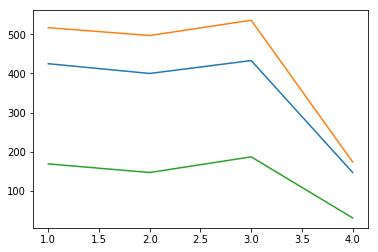

In [186]:
plt.plot(df_mad['Month'], df_mad['Searches'])
plt.plot(df_bcn['Month'], df_bcn['Searches'])
plt.plot(df_agp['Month'], df_agp['Searches'])
plt.show()

In [192]:
searches = pd.read_csv(path_to_zips+f_searches, compression='bz2', sep='^', usecols=['Date', 'Destination'], chunksize=100000, low_memory=False)

df_searches_all = pd.DataFrame()

for chunk in searches:
    
    chunk = chunk.dropna()
    
    #series_date = chunk['Date']
    chunk['Date2'] = pd.to_datetime(chunk['Date'])
    chunk['Month'] = chunk['Date2'].map(lambda x: x.month)
    chunk.drop(['Date'], axis=1, inplace=True)
        
    MAD = chunk['Destination'] == 'MAD'
    BCN = chunk['Destination'] == 'BCN'
    AGP = chunk['Destination'] == 'AGP'
    
    df_destinations_grouped = chunk[MAD | BCN | AGP].groupby(['Month', 'Destination'], as_index=False).count()
    df_destinations_grouped.rename(columns={'Date2':'Searches'}, inplace=True)
    df_searches_all = df_searches_all.append(df_destinations_grouped)

In [215]:
#df_searches_all.drop(['Date'], axis=1, inplace=True)
df_destinations_grouped = df_searches_all.groupby(['Month', 'Destination'], as_index=False).sum()

In [216]:
df_mad = df_destinations_grouped[df_destinations_grouped['Destination'] == 'MAD']
df_bcn = df_destinations_grouped[df_destinations_grouped['Destination'] == 'BCN']
df_agp = df_destinations_grouped[df_destinations_grouped['Destination'] == 'AGP']

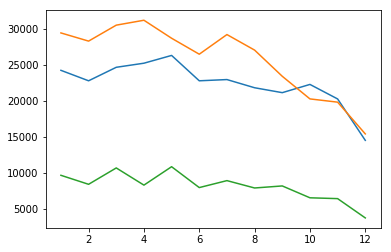

In [217]:
#Let's plot our data for Madrid, Barcelona and Malaga
plt.plot(df_mad['Month'], df_mad['Searches'])
plt.plot(df_bcn['Month'], df_bcn['Searches'])
plt.plot(df_agp['Month'], df_agp['Searches'])
plt.show()

## Exercise 4

- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). 
- For instance, search and booking origin and destination should match. For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 
- Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

1) Get familiar with data

2) Prepare the data for processing

3) Make action plan

4) Develop the code that works with a sample

5) Adjust the code to work with Big data

6) Test big data approach on a sample

7) Run program with big data

### 1) Get familiar with data

In [23]:
%%time

# First, we are going to check if the file has duplicate lines so we can make it smaller

all_chunks_bookings = pd.DataFrame()

bookings = pd.read_csv(path_to_zips+f_bookings, compression='bz2', sep='^', chunksize=500000, low_memory=False)

for i,chunk in enumerate(bookings):
    all_chunks_bookings = all_chunks_bookings.append(chunk)
    all_chunks_bookings = all_chunks_bookings.drop_duplicates()
    print(i, len(all_chunks_bookings))

0 500000
1 1000000
2 1000000
3 1000000
4 1000000
5 1000000
6 1000000
7 1000000
8 1000000
9 1000000
10 1499993
11 1499993
12 1499993
13 1499993
14 1499993
15 1499993
16 1499993
17 1499993
18 1499993
19 1499993
20 1499993
CPU times: user 6min 52s, sys: 49.1 s, total: 7min 42s
Wall time: 7min 42s


In [24]:
all_chunks_bookings.to_csv('bookings_no_dup.csv',sep='^',index=False)
! bzip2 -f bookings_no_dup.csv

In [25]:
%%time

all_chunks_searches = pd.DataFrame()

searches = pd.read_csv(path_to_zips+f_searches, compression='bz2', sep='^', chunksize=300000, low_memory=False)

for i,chunk in enumerate(searches):
    all_chunks_searches = all_chunks_searches.append(chunk)
    all_chunks_searches = all_chunks_searches.drop_duplicates()
    print(i, len(all_chunks_searches))

0 299999
1 358999
2 358999
3 358999
4 658992
5 718002
6 718002
7 718002
8 718002
9 718002
10 718002
11 718002
12 718002
13 718002
14 718002
15 718002
16 718002
17 718002
18 718002
19 718002
20 718002
21 718002
22 718002
23 718002
24 718002
25 718002
26 718002
27 718002
28 718002
29 718002
30 718002
31 718002
32 718002
33 718002
34 718002
35 718002
36 718002
37 718002
38 718002
39 718002
40 718002
41 718002
42 718002
43 718002
44 718002
45 718002
46 718002
47 718002
48 718002
49 718002
50 718002
51 718002
52 718002
53 718002
54 718002
55 718002
56 718002
57 718002
58 718002
59 718002
60 718002
61 718002
62 718002
63 718002
64 718002
65 718002
66 718002
67 718003
CPU times: user 9min 40s, sys: 1min 42s, total: 11min 22s
Wall time: 11min 24s


In [26]:
all_chunks_searches.to_csv('searches_no_dup.csv',sep='^',index=False)
! bzip2 -f searches_no_dup.csv

As we have seen both files had a lot of duplicate lines, so we have dropped them and created a to new smaller files:

    - bookings_no_dup.csv
    - searches_no_dup.csv
    
From now on we will use these new files.

In [9]:
! bzcat bookings_no_dup.csv.bz2 | wc -l

1499994


In [10]:
! bzcat searches_no_dup.csv.bz2 | wc -l

718004


In [80]:
bookings_no_dup = pd.read_csv('bookings_no_dup.csv.bz2', sep='^', low_memory=False)
bookings_no_dup.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1.0,2013.0,3.0,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1.0,2013.0,3.0,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1.0,2013.0,3.0,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1.0,2013.0,3.0,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1.0,2013.0,3.0,SYDA82546


In [81]:
list(bookings_no_dup.columns)

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

Let's remove the blank spaces from the column names.

In [83]:
bookings_no_dup.columns = bookings_no_dup.columns.map(lambda x: str(x).strip())
bookings_no_dup.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

In [84]:
searches_no_dup = pd.read_csv('searches_no_dup.csv.bz2', sep='^', low_memory=False)
searches_no_dup.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [126]:
searches_no_dup.columns = searches_no_dup.columns.map(lambda x: str(x).strip())
searches_no_dup.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')>

Now we will create the table with the columns we need for bookings and searches.

In [91]:
b = bookings_no_dup[['act_date', 'dep_port', 'arr_port']].copy()
b.iloc[0].tolist()

['2013-03-05 00:00:00', 'ZRH     ', 'LHR     ']

In [92]:
b.dep_port = b.dep_port.map(lambda x:str(x).strip().upper())
b.arr_port = b.arr_port.map(lambda x:str(x).strip().upper())

In [93]:
b.iloc[0].tolist()

['2013-03-05 00:00:00', 'ZRH', 'LHR']

In [86]:
s = searches_no_dup[['Date', 'Origin','Destination']].copy()
s.iloc[0].tolist()

['2013-01-01', 'TXL', 'AUH']

#### Now we will try to get rid off any NaN values and adjust re-format format the date.

In [90]:
print("size of Book:\t %d \nsize of Search:\t %d" % (len(b), len(s)))

size of Book:	 1499993 
size of Search:	 718003


In [104]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499993 entries, 0 to 1499992
Data columns (total 3 columns):
act_date    1499993 non-null object
dep_port    1499993 non-null object
arr_port    1499993 non-null object
dtypes: object(3)
memory usage: 34.3+ MB


In [105]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718003 entries, 0 to 718002
Data columns (total 3 columns):
Date           718003 non-null object
Origin         718002 non-null object
Destination    718002 non-null object
dtypes: object(3)
memory usage: 16.4+ MB


There is one null object in 'Origin' and 'Desination'

In [103]:
s[s.Origin.isnull() == True]

,Date,Origin,Destination
594999,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN,NaN


In [106]:
s[s.Destination.isnull() == True]

,Date,Origin,Destination
594999,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN,NaN


In [116]:
s.iloc[594999].tolist()[0]

'2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV'

In [129]:
searches_no_dup.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [157]:
s_nanVal = s.iloc[594999].tolist()[0].split(sep=',')
s_nanVal[:15]   

['2013-01-01',
 '10:15:33',
 'MPT',
 'b0af35b31588dc4ab06d5cf2986e8e02',
 'MD',
 'ATH',
 'MIL',
 '0',
 '1',
 'ATH',
 'MIL',
 '2013-01-04',
 '',
 '',
 '']

In [159]:
searches_no_dup.iloc[1].tolist()[:15]

['2013-01-01',
 '10:15:33',
 'MPT',
 'b0af35b31588dc4ab06d5cf2986e8e02',
 'MD',
 'ATH',
 'MIL',
 0.0,
 1.0,
 'ATH',
 'MIL',
 '2013-01-04',
 nan,
 nan,
 nan]

#### It seems the NaN value was already in the DataSet. So now we can drop this line from our dataframe

In [164]:
s = s.dropna()

#### Now we can format the date columns

In [170]:
b['act_date'] = pd.to_datetime(b['act_date'],errors='raise')
s['Date'] = pd.to_datetime(s['Date'],errors='raise')

In [172]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499993 entries, 0 to 1499992
Data columns (total 3 columns):
act_date    1499993 non-null datetime64[ns]
dep_port    1499993 non-null object
arr_port    1499993 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 34.3+ MB


In [171]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718002 entries, 0 to 718002
Data columns (total 3 columns):
Date           718002 non-null datetime64[ns]
Origin         718002 non-null object
Destination    718002 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 21.9+ MB


### 3) Make action plan

Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

1) remove duplicates

2) parse dates from string to datetime

3) remove whitespaces
    a) from colum names
    b) from content
    
4) remove NaN

5) define the model

    if there is one booking for a given O&D done at the same day as the search (for a given O&D), ALL searches of the day (for a given 0&D) might have resulted from the same source and will be set with 1.
    This is regardless of the boarding time of the plane... So if I was looking for plane for the first 4 days of December for a given O&D all those searches would be set to 1 not just the one correspoding to the correct boarding time

        match
        Search : [search_date, O&D] 
        Booking: [Activity_date, O&D]
        
6) execute the model

    a) Group by bookings on [Activity_date, O&D] so that we dont have duplicates 
        (and we can have number of bookings for the day)
        or we can just drop the duplicates
        
    b) search left join bookings adding "Booked" column
    
    c) test if the merge was done right
    
    d) fill NaN of "booked" column with 0
    
    e) pull all values of booked column >1 to 1

More complex... get number of segments from searches
match search_date, and then split all O&D of all segments, and match the date of first flight of each segment (seg1Date, seg2Date)
with boarding time and O&D and act_date of booking

#### Let's start with our cleaned datasets !!